<a href="https://colab.research.google.com/github/programmermahi/Machine-Learning-Lab/blob/main/Ann_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Step 1: দরকারি লাইব্রেরি ইমপোর্ট করা
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris   # Iris dataset load করার জন্য
from sklearn.model_selection import train_test_split  # ডাটা ভাগ করার জন্য
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
# Step 2: Iris dataset লোড করা
iris = load_iris()
X = iris.data    # Features (Sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

print("Dataset shape:", X.shape)   # (150, 4)
print("Labels shape:", y.shape)    # (150,)


Dataset shape: (150, 4)
Labels shape: (150,)


In [21]:
# Step 3: Label কে One-Hot Encoding করা (কারণ ANN multi-class output দেয়)
y_encoded = to_categorical(y)

print("Original labels:", y[:5])        # উদাহরণ: [0 0 0 0 0]
print("One-hot encoded labels:\n", y_encoded[:5])


Original labels: [0 0 0 0 0]
One-hot encoded labels:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [22]:
# Step 4: ডাটা Train-Test এ ভাগ করা
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (120, 4)
Testing data size: (30, 4)


In [23]:
# Step 5: Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("First 5 rows of scaled X_train:\n", X_train[:5])


First 5 rows of scaled X_train:
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


In [25]:
# Step 6: ANN Model বানানো (Original Model)
original_model = Sequential()
original_model.add(Dense(8, activation='relu', input_shape=(4,)))   # Hidden layer (8 neuron, relu)
original_model.add(Dense(3, activation='softmax'))                  # Output layer (3 classes)

original_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary দেখা
original_model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Step 7: Model Train করা (Original)
history_original = original_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Evaluate করা
loss, accuracy = original_model.evaluate(X_test, y_test, verbose=0)
print(f"Original Model Test Accuracy: {accuracy:.4f}")


Original Model Test Accuracy: 0.9333


In [27]:
# Step 8: ANN Model Modify করা
# এখানে আমরা নতুন hidden layer যোগ করবো এবং activation function পরিবর্তন করবো
modified_model = Sequential()
modified_model.add(Dense(16, activation='tanh', input_shape=(4,)))   # 1st hidden layer
modified_model.add(Dense(8, activation='sigmoid'))                   # 2nd hidden layer
modified_model.add(Dense(3, activation='softmax'))                   # Output layer

modified_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modified_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Step 9: Modified Model Train করা
history_modified = modified_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Evaluate করা
loss, accuracy = modified_model.evaluate(X_test, y_test, verbose=0)
print(f"Modified Model Test Accuracy: {accuracy:.4f}")


Modified Model Test Accuracy: 0.8333


In [29]:
# Step 10: Performance Compare করা
print("Original Model Performance:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(original_model.predict(X_test), axis=1)))

print("\nModified Model Performance:")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(modified_model.predict(X_test), axis=1)))


Original Model Performance:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Modified Model Performance:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.89      0.76         9
           2       0.88      0.64      0.74        11

    accuracy                           0.83        30
   macro avg       0.85      0.84      0.83        30
weighted avg       0.85      0.83      0.83        30



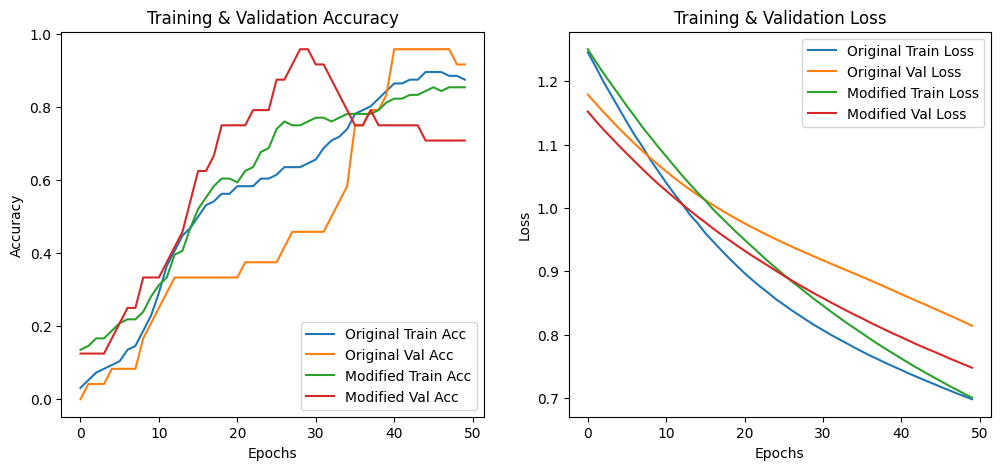

In [30]:
# Step 11: Loss এবং Accuracy Visualization
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history_original.history['accuracy'], label='Original Train Acc')
plt.plot(history_original.history['val_accuracy'], label='Original Val Acc')
plt.plot(history_modified.history['accuracy'], label='Modified Train Acc')
plt.plot(history_modified.history['val_accuracy'], label='Modified Val Acc')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history_original.history['loss'], label='Original Train Loss')
plt.plot(history_original.history['val_loss'], label='Original Val Loss')
plt.plot(history_modified.history['loss'], label='Modified Train Loss')
plt.plot(history_modified.history['val_loss'], label='Modified Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
